In [14]:
import qrcode
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
words = open("README.rst", "r").read().splitlines()
words[:5]

['=============================',
 'Pure python QR Code generator',
 '=============================',
 '',
 'Generate QR codes.']

In [10]:
maxstr = ""
for word in words:
    if len(word) > len(maxstr):
        maxstr = word
len(maxstr)

154

In [13]:
longstr = "".join(words[:85])
len(longstr)

2283

In [89]:
img = qrcode.make(longstr, image_factory=PyPNGImage)
img.save("longstr2283.png")


In [112]:
from pyzbar.pyzbar import decode
from PIL import Image

strs = []
img = Image.open('longstr2283.png')
result = decode(img)
for i in result:
    strs.append(i.data.decode("utf-8"))

restored = "".join(strs)
len(restored)

2283

In [6]:
import cv2
import zxingcpp

strs = []
img = cv2.imread('longstr2283.png')
results = zxingcpp.read_barcodes(img)
for result in results:
    strs.append(result.text)

restored = "".join(strs)
len(restored)

2283

In [7]:
words = open("zxing-decoded.txt", "r").read()
len(words)

2284

In [9]:
words[-40:-1]

'corrected.``ERROR_CORRECT_M`` (default)'

In [10]:
restored[-40:]

' corrected.``ERROR_CORRECT_M`` (default)'

In [11]:
restored == words[:-1]

True

In [14]:
len(longstr)

2283

In [15]:
restored == longstr

True

2283
(1024, 1024)


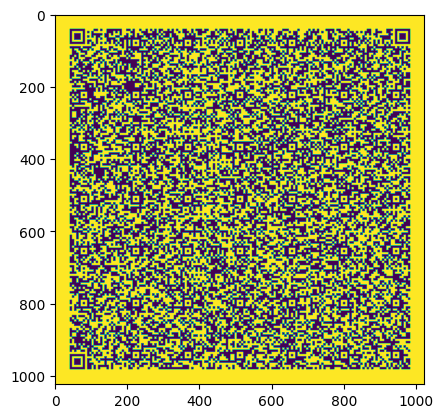

In [9]:
import matplotlib.pyplot as plt
import zxingcpp
from PIL import Image


words = open("README.rst", "r").read().splitlines()
longstr = "".join(words[:85])
print(len(longstr))

format = zxingcpp.BarcodeFormat.QRCode
img = zxingcpp.write_barcode(format, longstr, width=1024, height=1024)
print(img.shape)
img = Image.fromarray(img, "L")
plt.imshow(img)
img.save("zxingcpp1024x1024.png", size=(4096, 4096))


In [10]:
import cv2
import zxingcpp

strs = []
img = cv2.imread('zxingcpp1024x1024.png')
results = zxingcpp.read_barcodes(img)
for result in results:
    strs.append(result.text)

restored = "".join(strs)
len(restored)

2283

In [11]:
restored == longstr

True

In [15]:
import hashlib
guaranteed = set(hashlib.algorithms_guaranteed)
available = set(hashlib.algorithms_available)
available - guaranteed

{'md4',
 'md5-sha1',
 'ripemd160',
 'sha512_224',
 'sha512_256',
 'sm3',
 'whirlpool'}

In [20]:
bytes = open('zxingcpp1024x1024.png', "rb").read()
hashlib.sha256(bytes).hexdigest()


'6e71594e1aafce67052028b96a6d6eab4e2caa86ec0327df6cae041b89607f0a'

In [24]:
restored

'emma\nolivia\nava\nisabella\nsophia\ncharlotte\nmia\namelia\nharper\nevelyn\nabigail\nemily\nelizabeth\nmila\nella\navery\nsofia\ncamila\naria\nscarlett\nvictoria\nmadison\nluna\ngrace\nchloe\npenelope\nlayla\nriley\nzoey\nnora\nlily\neleanor\nhannah\nlillian\naddison\naubrey\nellie\nstella\nnatalie\nzoe\nleah\nhazel\nviolet\naurora\nsavannah\naudrey\nbrooklyn\nbella\nclaire\nskylar\nlucy\npaisley\neverly\nanna\ncaroline\nnova\ngenesis\nemilia\nkennedy\nsamantha\nmaya\nwillow\nkinsley\nnaomi\naaliyah\nelena\nsarah\nariana\nallison\ngabriella\nalice\nmadelyn\ncora\nruby\neva\nserenity\nautumn\nadeline\nhailey\ngianna\nvalentina\nisla\neliana\nquinn\nnevaeh\nivy\nsadie\npiper\nlydia\nalexa\njosephine\nemery\njulia\ndelilah\narianna\nvivian\nkaylee\nsophie\nbrielle\nmadeline\npeyton\nrylee\nclara\nhadley\nmelanie\nmackenzie\nreagan\nadalynn\nliliana\naubree\njade\nkatherine\nisabelle\nnatalia\nraelynn\nmaria\nathena\nximena\narya\nleilani\ntaylor\nfaith\nrose\nkylie\nalexandra\nmary\nmar

In [26]:
import cv2
import zxingcpp

vid = cv2.VideoCapture(0)
while (True):
    ret, frame = vid.read()
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord(' '):
        results = zxingcpp.read_barcodes(frame)
        strs = []
        for result in results:
            strs.append(result.text)
        restored = "".join(strs)
        print(len(restored))
        break 
            
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vid.release()
cv2.destroyAllWindows()

1751


In [29]:
hashlib.sha256(restored.encode()).hexdigest()


'13e4660d6fae38f415daf962acc69deda062a87a9b74d55a9fbdac7a45021c9b'

In [30]:
with open('readme.txt', 'w') as f:
    f.write(restored)

In [31]:

bytes = open('readme.txt', "rb").read()
hashlib.sha256(bytes).hexdigest()


'13e4660d6fae38f415daf962acc69deda062a87a9b74d55a9fbdac7a45021c9b'

In [ ]:
import matplotlib.pyplot as plt
import zxingcpp
from PIL import Image


bytes = open("screenshot.png", "r").read()
longstr = "".join(bytes[:2000])
print(len(longstr))

format = zxingcpp.BarcodeFormat.QRCode
img = zxingcpp.write_barcode(format, longstr, width=1024, height=1024)
print(img.shape)
img = Image.fromarray(img, "L")
plt.imshow(img)
img.save("zxingcpp1024x1024.png", size=(4096, 4096))


In [9]:
import matplotlib.pyplot as plt
import zxingcpp
from PIL import Image

bytes = open('screenshot.png', "rb").read()
window = bytes[:2000]
len(bytes), len(window), len(bytes)/len(window)
img = zxingcpp.write_barcode(format, window, width=1024, height=1024)
# print(img.shape)
# img = Image.fromarray(img, "L")
# plt.imshow(img)
# img.save("screenshot1024.png", size=(4096, 4096))


TypeError: write_barcode(): incompatible function arguments. The following argument types are supported:
    1. (format: zxingcpp.BarcodeFormat, text: str, width: int = 0, height: int = 0, quiet_zone: int = -1, ec_level: int = -1) -> numpy.ndarray[numpy.uint8]

Invoked with: <built-in function format>, b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x94\x00\x00\x03o\x08\x06\x00\x00\x00c\xedJR\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\x19tEXtSoftware\x00gnome-screenshot\xef\x03\xbf>\x00\x00 \x00IDATx\x9c\xec\xdd{XT\xd5\xfa\xc0\xf1/0#\x8c\xc2\x84\xa0"\x82\x05*\xe8\xa8\x98\xa0i\x88\xa5\x92\x98"Zbf\xa2e\x1d\xf5diy\xd2\xb2N\xd9]\xbbg?-\xcb\x8ey\xd4\xbc\xa4\x16\x98\x97\xd4\xa3\x84b"j\x02&\xea\x98Z`\x81\x80\n"\xa0\x03\xcc0\xf3\xfb\x03\xd0\x01\x07f\xb8x\xab\xf7\xf3<>\x8f\xcc\xde{\xad\xb5\xf7Z{\xefw\xd6Z{\x0f\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10\xe2\x16aW\xcf\xed\x9a\x02\x1e\xc0m\x80#\xe0\xd0h%\x12B\x08!\x84\x10\xd7S\x19P\x02\\\x00r\x80KuM\xa0\xae\x01\xa5\x1d\xe0\xe3\xe2\xe22\xb0s\xa7No87m\xda\xdaA\xa1\xb0\xb7\xb3\xabo\\*\x84\x10B\x08!n$\x93\xc9D\x99\xc1`,\xbat)\xfb\xe8\xb1c\xaf\x15\x16\x16\xc6\x01\xe9\x80\xc9\xd64\xea\x12\t\xda\x01\x9d;w\xea\xf4i\x1bO\xcf\x01\xc5%%\x94\x96\x96RVV\x86\xc9ds~B\x08!\x84\x10\xe2&bgg\x87\x83\x83\x03M\x9a4\xc1\xc9\xd1\x91\xcc\xac\xacX\xed\xb1c\xff\x02\x8ebcPY\x97\xa1j\xdf\xce\x9d:-l\xd5\xb2\xe5\x80\x0b\x05\x05\xe8\xf5z\x8cFc\xbd\n.\x84\x10B\x08!n\x1eF\xa3\x11\xbd^OqI\tn\xcd\x9b\xb7S5m\xea\x7f\xee\xdc\xb9\x9f\x80|[\xb6\xb7\xb71\x9f\xa6...\x03[\xb6h1\xa0\xa0\xb0Pz$\x85\x10B\x08!\xfe\x82L&\x13\x05\x85\x85\xb4j\xd9r\xa0\x8b\x8bK\x7f\xca\x9f\x9b\xb1\xca\xd6!o\xdf\x9eAA;M&\xd3\xed\x12L\n!\x84\x10B\xfc\xb5\xd9\xd9\xd9aggw\xea@rr\x7f\xca\xe7S\xd6\xca\xd6\x1e\xca\xdb\x1c\x1c\x1cZK0)\x84\x10B\x08\xf1\xd7g2\x99ppp\xf0\x04\\mY\xdf\xd6\x80\xd2\xd1h4*\xeb_,!\x84\x10B\x08q+\xa9\x88\xfd\x1cmY\xd7\xd6\x80\xd2\xc1h4\xca\xbb\x81\x84\x10B\x08!\xfe&*b?\x9b\x1e\xe0V\xd8\x9a\xa8\x0cw\x0b!\x84\x10B\xdc\xbc\xec\x00O\xa5\x91\xe6\x0e\xe5o\xe1\xc9+\xb3\'[oo\xfb\xcb$\xab\xa9K\xecgs@)\x84\x10B\x08!n>\xad\x14FF6/\xa1o3=n\x8a\xaa\xaft\xcc5\xd8\x93pQ\xc9w\xe7\x1d9k\xb0u`\xba\xee$\xa0\x14B\x08!\x84\xb8E\x8dp-\xe1q\xf7b\x9a\xd8Y\xeeMtW\x18\x19~[\t\x83\xd5\xa5,\xc9u\xe2\xfb|\x9b\xa6D\xd6\x99\x04\x94B\x08!\x84\x10\xb7\xa0)-uD\xdcVb\xd3\xbaM\xecL<\xd9B\x87\xa7\xd2\xc8\x17gU\x8d^\x96k\xd7\xf7)\x84\x10\xe2\xd6c\xefF\xe7\xfbF0\xee\x9fO\xd0\xdf\xeb:\xdc"\xec\x9c\xf1\xbe3\x84A\x0f\x0e\xa3\xa7\x87\xdc\x92\x84\xb0U\xa4k\x89\xcd\xc1\xa4\xb9\xe1\xb7\x95\xf0\xa0k\xdd\xb7\xb3F\xce^!\xae\x01{GW\xbc\xfc:\xe0\xe1TmA\xd3@\x9e\xfcj\x0b\xdb\xbe\xff\x84\x87\xda\xd90@`a\xfd\x1a\xd3\xae\xab\xba\x96\xa5\x92\x93\x0f\x83\xfe\xf5\t+6\xc5\x11\xbf{\'\x9b\xd7\xbcO\xa4\xcf\xcdw)i\xb4:\xf8\xbbq\xe8\xcc\xc8\x97^\xe0\xa9\xf1C\tp\xbb\x0e\xf5\xaa\xe8\xce\x13\x1f}\xc8\xeb/\x8c\'\xb8\xd5\xcd\xd7\x8e\x84\xb8\x19\xb5T\x18\x19\xef^\\\xf5C\xbbZ\xce\x9fj\xcb\x1ew/\xa6\x85\xa2q\x7f>[\xae\xa6B\xd4\xc0\xce}\x08\xef~3\x8b{\\\xe0\xcc\xf7\xd3\x89z\x7f\x1f:[\xb6s\x19\xc2\xbb\x1b^\xa5\xaf\xe2\x18\x0b\xc7Md\xf9\xa9+\'\xad}\xab\x00zut\xa5\x99C \xbd;5#\xfa\xf7\x0b\xb5>}W}\xfd\x98\xb3}jL\xbb\xae\xeaZ\x96rNt\x9f\xfc\x01\xaf<\xdc\x16\x07S1\x05y\x85\xe0\xac\xe7\xc2\xb9\xc6\xbd05Tc\xd6\xc1\xf5`\xe7\xdc\x9e\xfb\xc6<\xca\x83\x03z\xe0\xe7\xd5\x1c\x95\xe9\x12\xb9\x99\'8\x94\xb0\x91\xe5K\xff\xc7\xc9K7\xba\x84\xf5g\xe7\xdc\x8e\x01\xa3\xc7\xf1`h\x0f:z\xb9\xa1B\xc7\xb9?\xb4$\xedX\xc3\x7f\xbf\xdeC\xd6\x8d.\xa0\x10\r\x94\x90\x98X\xeb\xf2\x90\xe0\xe0F\xcfsT\xf3\x92\xaas&\xed\xecq}\xf5kJvoD\x17\xb7\xa6\xca\xba\xaa\xd0\xd18\xf6\x1dF\xfe\xdb\x8f\x81\xa9\xfcZ\xe8hg\xe2!\xd7\x12\x16\x9ek\xbc\xa1o\t(\x85\xb0\xc8\x81\xf6\x0f\x8e!\xd8\xb9\xfc[]\xcb\xfb\xc7p\xff\xd2\x9f\xf9>\xc7\x86\xc0\xc9\xce\x1e\x07\x07\xcb\xafm5\x9e\xda\xc0\'\x1f7#\xd4\xfd$\x1bwX\x0fd\xaeZ_Ys\xdauU\xd7\xb2\x00\xa0\xe8D\xbf{\xbdP\x98\xf2\x89}u4o\xc4\x15\xdc\xf0`\xcc\xa2F\xac\x83k\xcd\xde\xfd\x1ef|\xfa\x16\x0f\xf8:\x99\xfd\x16\xae\x0b\xad\xda\x05\x11\xea\xfc\x07?\xfcw\xeb\r,]\xc3\xd4\xb4o\x1e~w\x11\xa6?\xc0\xf2e{n`\xe9\x84h<5\x05\x8d\xd6\x82\xcd\xfa\xb0\x03\xfa4\xd3W\xfd\xd0d\xa4x\xf7\x06\xd4O\xbe\x03\n%\xbam+\x00p\n}\x18\x97\'\xe7P\xb8\xf8\x8d\xcb\xc1d\xa5\xbe\xcez\xbe<\xa7j\xb4k\xa0\x04\x94BX\xa2\xea\xc5\xa8\x07\xdb\xe3`\xf8\x95}\xbf\xb4\xe4\xae\x9e=\x19\xf9\x80\x1f\x9b\xfe\xf3+\x86\xcau\xec\xd4h\x86Ob\xe2\xc3\xfd\xb9\xb3\xad+v\x17Os\xe4\xdbw\x98\xf9]\xc5r\x85\x86\xc9\xab\x13\x98\x0c\xe8\x0f~\xc2\xe8)k\xc9q\xe8\xca\x88)\x8f2\xb8\xe9iL?\xa7p\xf2\xd1\xb5\xbc\xd2\xd7\x91\xdc\xef\xff\xc5C\xef\xff\x8c\x1e{|\x1e\xfb\x8aeOu\xc2t\xf0\xff\x18\xf3\xaf\xd3W\xd6\xdf\xbf\x83\xcfN\xd5\x90\xf6\xd4m\xf4x?\x86\x97C\x1c\xc9]7\x8d\x87>8\x80\x1e\x07:L\\\xca\x7f\'\xb4\xc7\xb0\xef=F=\xb7\x81\\\xf3+\x87\xa2k\x95\xb4?=\xea\xc3\x83\xafLcx\x97\xb6\xb4r\xbb\rgG\x13EYG\xd8\xb5\xea3\x16l\xf8\x95\x8b&\xc0\xce\x19\xb5\x8b\x1d\xd8\xbb2p\xce\xff\x18\x08\x18s\xbe\xe5\xd9\x87\xe6\x92blA\xe0#\x93\x998\xa2/\x1a\x8f&\\:}\x98\xf85_\xf2\xe5\xf7G(0\x01\xf6m\t}\xfaI"{w\xa1\x9d\x97;\xce\x8a\x12\xce\x9f\x8c\xe6\xb5\xa7c\xf1y\xe1\x19\x86wmG\x9b\x96\xb7\xd1LQB\x8ev\x17\x9bw\x9d\xa3\xc3}\xf7sW\x0778\x9f\xc6\xcf\xeb>\xe5\xa3\xaf\x0fp\xde\x08\xa0\xa2\xe7\x93\x1f\xf1\xaf!\xedi\xed\xd6\x0cEi>\x7f\xa4\xc6\xb1\xea\xd3\x85l\xfd\xdd\xac\x1f\xd9Z\x1d\xec\xdf\xc1\xa7\xa9\x06\xb0\xb7Rv\x87\x0e\xd6\x8fM}\xd8\xb9\xd2\x7f\xdaK\x0c\xf7u\xc2T\x90\xca\xdaO\xe6\xf3m\xe2IrK\x9dh\xe1\xdb\x8d \xf7?I\xae\x1c\xd5\xb2VF[\xd7Qx\xd0k\xcc?\x19\x1f\xd1\x87N\x9e\xcd\xa0\xe4\x02\xe7N\x9f\xe2\xd7\xcd\x0bx{\x8d\x16\xbd\x85b\x02\xe0\xd0\x82\x9eQS\x98\xf8`_:\xb6t\xa00\xe3\x10;W.`\xe1\xe6\x13X\xec@5\xdf\xb7\x8b\xc7\xd90\x7f\x1ek\x13\x7f#\xd7\xd0\x14\x8f\x0e\xdd\xf1\'\x89\x0c#W^\x99l\xd7\x8a\x88\x0f~`D3GJ\xce\x1c\xe3\xa7o\xe61?FKQmm\xe7\xc9\x85\xfcRf\xbd\xee\x1ex\xb9\xae\xed\xab\x1e\xfb+\xc4u\xd2Zi\xc4\xdd\xc2puq\xdcZ\x80\xf2\xa0\x120\x19JQ?\xf9\x0e\x85\x8b\xdf\xb8\x1c`\x9asW\x18\xf1P\x1a\xc9\xd67\xceT\x13\t(\x85\xb8\x8a\x1dn\xfdG\xd0\xdf\xdd\x8e\xe2}1|\xf8u;\xe6\x07\x8d\xc6g\xe8\x83\xf4X\xfe>\xfbt\x00*:'; kwargs: width=1024, height=1024